In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('train_HP.csv')

In [3]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dataset.shape

(1460, 81)

## Verificacion de NAN en una columna

In [8]:
dataset['MSSubClass'].isnull().sum()

0

In [15]:
#forma 1 para automatizar el proceso de ver que columnas tienen nulos
def getNanColNames(df):
    colnames = df.columns
    cols_con_na = []
    for col in colnames:
        if (df[col].isnull().sum() > 0):
            cols_con_na.append(col)
    return cols_con_na

In [21]:
cols_con_nan = getNanColNames(dataset)
cols_con_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [22]:
### Verificamos tipo de columnas con NaN

# tenemos que ver que tipos de datos tenemos para ver que estrategias  vamos a utilizar de inputation
dataset[cols_con_nan].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [24]:
# obtener la proporcion de faltantes para aplicar heuristicas
dataset[cols_con_nan].isnull().mean()  #esto funciona porque los falsos python los pone como ceros y los true como unos.

## las columnas que tienen una proporcion de mas 

## cuando una columna tiene una proporcion muy alta (mas de 50%) y el tipo de datos es numerico, entonces es una candidata a eliminarla
    ## Pero igual hay que analizar, ya que PoolQC tiene una proporcion alta de nulos pero es normal.
## cuando una columna tiene una proporcion muy alta y el tipo de datos es un string, o un object, se recomienda hacer una revision mas exaustiva de la columna,
## ya que dicha columna puede tener un efecto muy importante en la variable target

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [31]:
## Aplicando metodo de inputacion CCA
## CCA = Eliminar las ocurrencias
## Si la columna en esa fila tiene NA entonces se elimina toda la fila


# obtener los nombres de las columnas adecuadas (las procesables)
# el rate normalmente en la industria es de 0.2
def getNanGoodColsNames(df, rate = 0.2):
    cols_procesables = []
    for col in df.columns:
        if (df[col].isnull().mean() < rate):
            cols_procesables.append(col)
    return cols_procesables

In [39]:
cols_procesables = getNanGoodColsNames(dataset)
cols_procesables

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3Ssn

In [36]:
cols_cca = getNanGoodColsNames(dataset, 0.05)
cols_cca

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [37]:
## aplicamos criterio de CCA (Complete Case Analysis)
dataset_temp = dataset[cols_cca].dropna()

In [38]:
dataset_temp.shape, dataset.shape

((1412, 70), (1460, 81))

In [40]:
# vemos que no tenemos mucha diferencia en la reduccion, entonces no hay problema.   Recordmeos que estamos solo reduciendo hasta el 5% (0.05)

In [41]:
### Ahora veamos que tan diferentes se ven una columna que no tiene CCA, y cuando tiene CCA

## porejemplo la columna Gr
.....

81

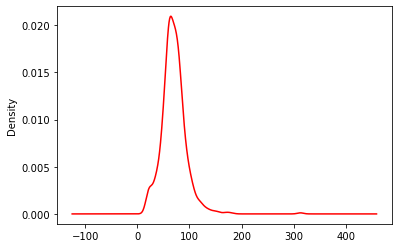

In [43]:
## ahora aplicaremos analisis mas profundo

## graficamos columna
dataset['LotFrontage'].plot.density(color='red')
plt.show()

In [47]:
## ahora imputamos, aplicando la media, y tambien la mediana

meanValue = np.round(dataset['LotFrontage'].mean(),0)
meanValue

70.0

In [48]:
# sacamos la mediana
medianValue = np.round(dataset['LotFrontage'].median(),0)
medianValue

69.0

In [52]:
# aplicamos inputacion con la media
dataset_FL_meanImp = dataset['LotFrontage'].fillna(meanValue)

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [53]:
# aplicamos inputacion con la mediana
dataset_FL_medianImp = dataset['LotFrontage'].fillna(medianValue)

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

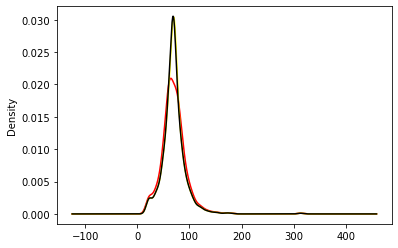

In [60]:
# hasta aca tenemos tres datasets, el original, uno 

fig = plt.figure() #para hacer una figura donde esten las 3 columnas
fig.add_subplot(111)  #es para graficar una fila, una columna en un mismo grafica.  1=El mismo lienzo, 1=1 fila, 1=1 columna

dataset['LotFrontage'].plot.density(color='red')
dataset_FL_meanImp.plot.density(color='yellow')
dataset_FL_medianImp.plot.density(color='black')
plt.show()

In [61]:
## Vemos que la distorcion entre las graficas es poca, solo se ve afectada la densidad pero eso tiene sentido.
## Entonces vemosque estas inputaciones son correctas.
## NOTA: Hay formas numericas de aplicar.  Buscar en google: Distortion measure in python.  Tambien usando la funcion np.corrcoef


In [ ]:
TAREA:
    Cree una funcion que inpute la media o la mediana, en funcion de la correlacion entre una columna y el target,
    su funcion debe consieerar si la imputacion es valida (si no es la mitad de la data).  Debe mostrar su funcion funcionando para tres datasets distintos.
     dataframe, columna a imputar, columna target
        entontrar ambas imputaciones
        encontrar 
        comparar
        deciden que hay que hacer
        y 